# **PAT 1**
### **Name -** Yash Vardhan Sharma
### **Reg. No. -** 19BCE1097
### **Professor -** Dr. L Jeganathan

## **Code of Academic Integrity**
I affirm that
* This work is my own original work and is not a borrowed work,
either from other students or from assignments for other courses.
* I have not given or received any unauthorized help on this assignment.
* This submission is free from
<ul>
  <li>Plagiarism</li>
  <li>Fabrication of facts</li>
  <li>Unauthorized assistance</li>
  <li>Collusion</li>
</ul>
* This submission gives proper credit to sources and references,
acknowledges the contributions and ideas of others relevant to
this academic work.
* This submission was prepared by me fully adhering to the rules
that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in
any other behavior that subverts the purpose of the assignment
and the directions of the teacher.

# **1**

In [ ]:
#importing all the required libraries.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

In [ ]:
from sympy import sympify, Symbol
import numpy as np

def symbolize(s):
    """
    Converts a a string (equation) to a SymPy symbol object
    """
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    s3=sympify(s2)
    
    return(s3)

def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    sym_s=symbolize(s)
    sym_set=sym_s.atoms(Symbol)
    sym_lst=[]
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Length of the input values did not match number of variables and symbolic evaluation is not selected")
        return None
    else:
        if type(vals)==list:
            sub=list(zip(sym_lst,vals))
        elif type(vals)==dict:
            l=list(vals.keys())
            l.sort()
            lst=[]
            for i in l:
                lst.append(vals[i])
            sub=list(zip(sym_lst,lst))
        elif type(vals)==tuple:
            sub=list(zip(sym_lst,list(vals)))
        result=sym_s.subs(sub)
    
    return result

def flip(y,p):
    """
    Flips random bit (used to make a classification problem haredr)
    """
    lst=[]
    for i in range(len(y)):
        f=np.random.choice([1,0],p=[p,1-p])
        lst.append(f)
    lst=np.array(lst)
    return np.array(np.logical_xor(y,lst),dtype=int)


def gen_classification_symbolic(m=None,n_samples=100,n_features=2,flip_y=0.0):
    """
    Generates classification sample based on a symbolic expression.
    Calculates the output of the symbolic expression at randomly generated (Gaussian distribution) points and
    assigns binary classification based on sign.
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate classification samples with n_features.
    flip_y: Probability of flipping the classification labels randomly. A higher value introduces more noise and make
            the classification problem harder.
    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals_binary=evals>0
    evals_binary=evals_binary.flatten()
    evals_binary=np.array(evals_binary,dtype=int)
    evals_binary=flip(evals_binary,p=flip_y)
    evals_binary=evals_binary.reshape(n_samples,1)
    
    lst_features=lst_features.reshape(n_samples,n_features)
    x=np.hstack((lst_features,evals_binary))
    
    return (x)


def gen_regression_symbolic(m=None,n_samples=100,n_features=2,noise=0.0,noise_dist='normal'):
    """
    Generates regression sample based on a symbolic expression. Calculates the output of the symbolic expression 
    at randomly generated (drawn from a Gaussian distribution) points
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate regression samples with n_features.
    noise: Magnitude of Gaussian noise to be introduced (added to the output).
    noise_dist: Type of the probability distribution of the noise signal. 
    Currently supports: Normal, Uniform, t, Beta, Gamma, Poission, Laplace

    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    return (x)

In [ ]:
x = gen_regression_symbolic(m='8*(x1) + 3.5*(x2) + 9', n_samples=1000, noise=0.1, n_features=2)
D = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
D

,x1,x2,r
0,0.886207,0.597989,25.1298817607415
1,-2.59665,1.49055,10.6407700536397
2,-2.8019,-12.1548,-195.949532928569
3,-3.3236,2.54858,20.6546801814512
4,-2.34028,-2.52087,-47.4038479303094
...,...,...,...
995,-0.499636,1.04442,20.5485339614135
996,-1.8709,-1.44194,-27.4609641578335
997,1.75326,5.90331,111.327344336814
998,-14.5227,0.580894,-98.3494768887116


a.

In [ ]:
D.shape

(1000, 3)

In [ ]:
D = D.astype(float)

In [ ]:
D.tail(15)

,x1,x2,r
985,4.401132,-9.428903,-97.227248
986,4.627598,2.856208,88.840934
987,-11.080259,-0.832465,-92.258490
988,-3.596485,5.024977,55.548472
989,-1.543871,-0.810643,-15.611499
990,-5.115337,-7.770761,-148.329964
991,2.781809,-1.649717,6.475178
992,2.178232,-7.542222,-86.758389
993,-2.054930,2.515333,30.331409
994,8.223743,-6.940949,-29.295616


b.

In [ ]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   r       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
D.agg({
    "x1": ["min","max", "median","skew","mean", "count"],
    "x2": ["min","max", "median","skew","mean", "count"],
    "r": ["min","max", "median","skew","mean", "count"]
})

,x1,x2,r
min,-16.737896,-16.351828,-285.748033
max,16.808828,17.163857,282.978886
median,-0.116719,-0.023124,7.723970
skew,-0.139704,0.062084,-0.030964
mean,-0.193566,-0.059355,6.558508
count,1000.000000,1000.000000,1000.000000


c.

In [ ]:
D.describe()

,x1,x2,r
count,1000.000000,1000.000000,1000.000000
mean,-0.193566,-0.059355,6.558508
std,5.195361,5.084306,86.486040
min,-16.737896,-16.351828,-285.748033
25%,-3.630911,-3.612519,-54.122637
50%,-0.116719,-0.023124,7.723970
75%,3.318518,3.163659,65.086899
max,16.808828,17.163857,282.978886


d.

In [ ]:
D1 = D.iloc[:int(D.shape[0])-int(D.shape[0]/4),:int(D.shape[1]/2)]
D1

,x1
0,0.886207
1,-2.596650
2,-2.801903
3,-3.323604
4,-2.340281
...,...
745,1.042036
746,1.350388
747,3.433457
748,-1.034521


e.

In [ ]:
D2 = D1
for i in range(0, D1.shape[0]):
    for j in range(0, D1.shape[1]):
        if(i>j):
            D2.iat[i, j] = 0;
        else:
            D2.iat[i, j] = D1.iat[i, j];

D2

,x1
0,0.886207
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
745,0.000000
746,0.000000
747,0.000000
748,0.000000


f.

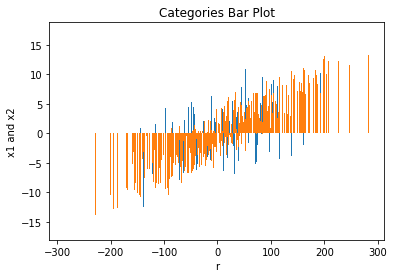

In [ ]:
plt.bar(D['r'],D['x1'])
plt.bar(D['r'],D['x2'])
plt.xlabel('r')
plt.ylabel("x1 and x2")
plt.title('Categories Bar Plot')
plt.show()

g.

In [ ]:
test_size = int(1000*(1/5))
test_df = D.iloc[-test_size:]
test_df

,x1,x2,r
800,1.709875,2.582602,61.432580
801,1.874679,1.900640,52.347495
802,3.265437,4.731167,105.993550
803,-0.217827,2.677000,47.345443
804,-11.994625,-9.078921,-223.245487
...,...,...,...
995,-0.499636,1.044425,20.548534
996,-1.870897,-1.441939,-27.460964
997,1.753264,5.903305,111.327344
998,-14.522701,0.580894,-98.349477


In [ ]:
train_size = int(1000*(4/5))
train_df = D.iloc[:train_size]
train_df

,x1,x2,r
0,0.886207,0.597989,25.129882
1,0.000000,1.490552,10.640770
2,0.000000,-12.154795,-195.949533
3,0.000000,2.548575,20.654680
4,0.000000,-2.520874,-47.403848
...,...,...,...
795,-0.518946,3.626591,59.179711
796,4.047868,4.964055,115.893482
797,-0.736922,-7.905896,-115.477924
798,9.033125,1.593845,105.227314


# 2

In [ ]:
class LR_Norm_Eqn:
  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])
  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp
  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)
  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    5
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

a.

In [ ]:
D2 = D.copy()
D2.insert(2,"x1^2",D2['x1']**2)
D2.insert(3,"x2^2",D2['x2']**2)
D2.insert(4,"x1*x2",D2['x1']*D2['x2'])
D2.head()

,x1,x2,x1^2,x2^2,x1*x2,r
0,0.886207,0.597989,0.785363,0.357591,0.529942,25.129882
1,0.000000,1.490552,0.000000,2.221746,0.000000,10.640770
2,0.000000,-12.154795,0.000000,147.739051,-0.000000,-195.949533
3,0.000000,2.548575,0.000000,6.495236,0.000000,20.654680
4,0.000000,-2.520874,0.000000,6.354807,-0.000000,-47.403848


In [ ]:
test_size = 200
test2 = D2.iloc[-test_size:]
train2 = D2.iloc[:-test_size]
train_data2 = np.asarray(train2)
test_data2 = np.asarray(test2)
X2 = train_data2[:,:-1] 
r2 = train_data2[:,-1:] 
test_X2 = test_data2[:,:-1]
test_r2 = test_data2[:,-1:]
ones2 = np.ones((len(X2),1))
Dmat2 = np.hstack((ones2,X2))
ones2 = np.ones((len(test_X2),1))
test_Dmat2 = np.hstack((ones2,test_X2))

In [ ]:
length2 = Dmat2.shape[1]
lin = LR_Norm_Eqn(length2)
print('Weights are ',lin.fit(Dmat2,r2))

Weights are  [[ 7.44047584e+00]
 [ 7.99119499e+00]
 [ 1.50000897e+01]
 [ 3.00028555e-02]
 [-1.00705264e-02]
 [-3.64260577e-03]]


In [ ]:
predicted2 = lin.predict(Dmat2,r2)
test_predicted2 = lin.predict(test_Dmat2,test_r2)
print("Error with train data: ",lin.measure(predicted2,r2))
print("Error with test data: ",lin.measure(test_predicted2,test_r2))

Error with train data:  1572.8849716689072
Error with test data:  2.4552236553599895


In [ ]:
# Predict an unknown value 
predict_unknown2 = lin.predict(18, 18)
predict_unknown2

array([[ 1.33928565e+02],
       [ 1.43841510e+02],
       [ 2.70001614e+02],
       [ 5.40051400e-01],
       [-1.81269475e-01],
       [-6.55669038e-02]])

In [ ]:
y0 = predict_unknown2[0]*18 + predict_unknown2[1]*18*18 + predict_unknown2[2]*18*18*18 + predict_unknown2[3]*18*18 + predict_unknown2[4]*18
y0

array([1623836.49146394])

b.

In [ ]:
D3 = D.copy()
D3.insert(2,"x1^3",D3['x1']**3)
D3.insert(3,"x2^3",D3['x2']**3)
D3.insert(4,"x1*x2",D3['x1']*D3['x2'])
D3.head()

,x1,x2,x1^3,x2^3,x1*x2,r
0,0.886207,0.597989,0.695994,0.213835,0.529942,25.129882
1,0.000000,1.490552,0.000000,3.311629,0.000000,10.640770
2,0.000000,-12.154795,0.000000,-1795.737943,-0.000000,-195.949533
3,0.000000,2.548575,0.000000,16.553598,0.000000,20.654680
4,0.000000,-2.520874,0.000000,-16.019669,-0.000000,-47.403848


In [ ]:
test_size = 200
test3 = D3.iloc[-test_size:]
train3 = D3.iloc[:-test_size]
train_data3 = np.asarray(train3)
test_data3 = np.asarray(test3)
X3 = train_data3[:,:-1] 
r3 = train_data3[:,-1:] 
test_X3 = test_data3[:,:-1]
test_r3 = test_data3[:,-1:]
ones3 = np.ones((len(X3),1))
Dmat3 = np.hstack((ones3,X3))
ones3 = np.ones((len(test_X3),1))
test_Dmat3 = np.hstack((ones3,test_X3))

In [ ]:
length3 = Dmat3.shape[1]
lin = LR_Norm_Eqn(length3)
print('Weights are ',lin.fit(Dmat3,r3))

Weights are  [[ 7.16349216e+00]
 [ 7.98155968e+00]
 [ 1.45891937e+01]
 [ 1.35960550e-03]
 [ 5.48553709e-03]
 [-6.01001870e-03]]


In [ ]:
predicted3 = lin.predict(Dmat3,r3)
test_predicted3= lin.predict(test_Dmat3,test_r3)
print("Error with train data: ",lin.measure(predicted3,r3))
print("Error with test data: ",lin.measure(test_predicted3,test_r3))

Error with train data:  1571.0097851427915
Error with test data:  9.649814928889226


In [ ]:
# Predict an unknown value 
predict_unknown = lin.predict(18, 18)
predict_unknown

array([[ 1.28942859e+02],
       [ 1.43668074e+02],
       [ 2.62605487e+02],
       [ 2.44728990e-02],
       [ 9.87396677e-02],
       [-1.08180337e-01]])

In [ ]:
y0 = predict_unknown[0]*18 + predict_unknown[1]*18*18 + predict_unknown[2]*18*18*18 + predict_unknown[3]*18*18 + predict_unknown[4]*18
y0

array([1580394.33488522])

c.

In [ ]:
D4 = D.copy()
D4.insert(2,"x1^2",D4['x1']**2)
D4.insert(3,"x2^2",D4['x2']**2)
D4.insert(4,"x1*x2",D4['x1']*D4['x2'])
D4.head()

,x1,x2,x1^2,x2^2,x1*x2,r
0,0.886207,0.597989,0.785363,0.357591,0.529942,25.129882
1,0.000000,1.490552,0.000000,2.221746,0.000000,10.640770
2,0.000000,-12.154795,0.000000,147.739051,-0.000000,-195.949533
3,0.000000,2.548575,0.000000,6.495236,0.000000,20.654680
4,0.000000,-2.520874,0.000000,6.354807,-0.000000,-47.403848


In [ ]:
test_size = 800
test4 = D4.iloc[test_size:]
train4 = D4.iloc[:test_size]
train_data4 = np.asarray(train4)
test_data4 = np.asarray(test4)
X4 = train_data4[:,:-1] 
r4 = train_data4[:,-1:] 
test_X4 = test_data4[:,:-1]
test_r4 = test_data4[:,-1:]
ones4 = np.ones((len(X4),1))
Dmat4 = np.hstack((ones4,X4))
ones4 = np.ones((len(test_X4),1))
test_Dmat4 = np.hstack((ones4,test_X4))

In [ ]:
length4 = Dmat4.shape[1]
lin = LR_Norm_Eqn(length4)
print('Weights are ',lin.fit(Dmat4,r4))

Weights are  [[ 7.44047584e+00]
 [ 7.99119499e+00]
 [ 1.50000897e+01]
 [ 3.00028555e-02]
 [-1.00705264e-02]
 [-3.64260577e-03]]


In [ ]:
predicted4 = lin.predict(Dmat4,r4)
test_predicted4 = lin.predict(test_Dmat4,test_r4)
print("Error with train data: ",lin.measure(predicted4,r4))
print("Error with test data: ",lin.measure(test_predicted4,test_r4))

Error with train data:  1572.8849716689072
Error with test data:  2.4552236553599895


In [ ]:
# Predict an unknown value 
predict_unknown = lin.predict(18, 18)
predict_unknown

array([[ 1.33928565e+02],
       [ 1.43841510e+02],
       [ 2.70001614e+02],
       [ 5.40051400e-01],
       [-1.81269475e-01],
       [-6.55669038e-02]])

In [ ]:
y0 = predict_unknown[0]*18 + predict_unknown[1]*18*18 + predict_unknown[2]*18*18*18 + predict_unknown[3]*18*18 + predict_unknown[4]*18
y0

array([1623836.49146394])

d.

In [ ]:
D5 = D.copy()
D5.insert(2,"x1^3",D5['x1']**3)
D5.insert(3,"x2^3",D5['x2']**3)
D5.insert(4,"x1*x2",D5['x1']*D5['x2'])
D5.head()

,x1,x2,x1^3,x2^3,x1*x2,r
0,0.886207,0.597989,0.695994,0.213835,0.529942,25.129882
1,0.000000,1.490552,0.000000,3.311629,0.000000,10.640770
2,0.000000,-12.154795,0.000000,-1795.737943,-0.000000,-195.949533
3,0.000000,2.548575,0.000000,16.553598,0.000000,20.654680
4,0.000000,-2.520874,0.000000,-16.019669,-0.000000,-47.403848


In [ ]:
test_size = 800
test5 = D5.iloc[test_size:]
train5 = D5.iloc[:test_size]
train_data5 = np.asarray(train5)
test_data5 = np.asarray(test5)
X5 = train_data5[:,:-1] 
r5 = train_data5[:,-1:] 
test_X5 = test_data5[:,:-1]
test_r5 = test_data5[:,-1:]
ones5 = np.ones((len(X5),1))
Dmat5 = np.hstack((ones5,X5))
ones5 = np.ones((len(test_X5),1))
test_Dmat5 = np.hstack((ones5,test_X5))

In [ ]:
length5 = Dmat5.shape[1]
lin = LR_Norm_Eqn(length5)
print('Weights are ',lin.fit(Dmat5,r5))

Weights are  [[ 7.16349216e+00]
 [ 7.98155968e+00]
 [ 1.45891937e+01]
 [ 1.35960550e-03]
 [ 5.48553709e-03]
 [-6.01001870e-03]]


In [ ]:
predicted5 = lin.predict(Dmat5,r5)
test_predicted5 = lin.predict(test_Dmat5,test_r5)
print("Error with train data: ",lin.measure(predicted5,r5))
print("Error with test data: ",lin.measure(test_predicted5,test_r5))

Error with train data:  1571.0097851427915
Error with test data:  9.649814928889226


In [ ]:
# Predict an unknown value 
predict_unknown = lin.predict(18, 18)
predict_unknown

array([[ 1.28942859e+02],
       [ 1.43668074e+02],
       [ 2.62605487e+02],
       [ 2.44728990e-02],
       [ 9.87396677e-02],
       [-1.08180337e-01]])

In [ ]:
y0 = predict_unknown[0]*18 + predict_unknown[1]*18*18 + predict_unknown[2]*18*18*18 + predict_unknown[3]*18*18 + predict_unknown[4]*18
y0

array([1580394.33488522])

# 3.

a.

In [ ]:
X = D2[['x1','x2','x1^2','x2^2','x1*x2']]
y = D2['r']
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

coeff_D2 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_D2=coeff_D2.T
coeff_D2['noise'] = 1.0
coeff_D2['bias'] = 1.11
coeff_D2

,x1,x2,x1^2,x2^2,x1*x2,noise,bias
Coefficient,8.011739,14.996124,0.020536,-0.006555,-0.002897,1.0,1.11


In [ ]:
X = D3[['x1','x2','x1^3','x2^3','x1*x2']]
y = D3['r']
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

coeff_D3 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_D3=coeff_D3.T
coeff_D3['noise'] = 1.0
coeff_D3['bias'] = 1.11
coeff_D3

,x1,x2,x1^3,x2^3,x1*x2,noise,bias
Coefficient,8.022799,14.728667,-0.000316,0.003495,0.015568,1.0,1.11


In [ ]:
X = D4[['x1','x2','x1^2','x2^2','x1*x2']]
y = D4['r']
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

coeff_D4 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_D4=coeff_D4.T
coeff_D4['noise'] = 1.0
coeff_D4['bias'] = 1.11
coeff_D4

,x1,x2,x1^2,x2^2,x1*x2,noise,bias
Coefficient,8.011739,14.996124,0.020536,-0.006555,-0.002897,1.0,1.11


In [ ]:
X = D5[['x1','x2','x1^3','x2^3','x1*x2']]
y = D5['r']
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

coeff_D5 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_D5=coeff_D5.T
coeff_D5['noise'] = 1.0
coeff_D5['bias'] = 1.11
coeff_D5

,x1,x2,x1^3,x2^3,x1*x2,noise,bias
Coefficient,8.022799,14.728667,-0.000316,0.003495,0.015568,1.0,1.11


In [ ]:
gg=[coeff_D2,coeff_D3,coeff_D4,coeff_D5]
DF=pd.concat(gg)
DF

,x1,x2,x1^2,x2^2,x1*x2,noise,bias,x1^3,x2^3
Coefficient,8.011739,14.996124,0.020536,-0.006555,-0.002897,1.0,1.11,NaN,NaN
Coefficient,8.022799,14.728667,NaN,NaN,0.015568,1.0,1.11,-0.000316,0.003495
Coefficient,8.011739,14.996124,0.020536,-0.006555,-0.002897,1.0,1.11,NaN,NaN
Coefficient,8.022799,14.728667,NaN,NaN,0.015568,1.0,1.11,-0.000316,0.003495


In [ ]:
DF.drop_duplicates()
DF

,x1,x2,x1^2,x2^2,x1*x2,noise,bias,x1^3,x2^3
Coefficient,8.011739,14.996124,0.020536,-0.006555,-0.002897,1.0,1.11,NaN,NaN
Coefficient,8.022799,14.728667,NaN,NaN,0.015568,1.0,1.11,-0.000316,0.003495
Coefficient,8.011739,14.996124,0.020536,-0.006555,-0.002897,1.0,1.11,NaN,NaN
Coefficient,8.022799,14.728667,NaN,NaN,0.015568,1.0,1.11,-0.000316,0.003495


### **E1(we have taken as D2) is better than than the rest because**

### **b. Inference:**
1. Coefficients of E1, E2, E3, E4 are similar to each other.
2. The coefficients didn't change even when we swapped the testing and training datasets.
3. After performing EDA and Regression models we conclude that:
 - Model E1(with the dataset D3) performs better than all the models.
 - This is evident also from the predicted values which are closer to the actual r if x1 and x2 were to be passed as variables.

 - The coefficients didn't change after swapping the testing and training datasets.

 - Coefficients of E1, E2, E3, E4 are almost equal to each other and it can be found from the previous cell.
